# KNN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Benign: 357
Number of Malignant: 212
Train Result:

accuracy score: 0.9802

Classification Report: 
               precision    recall  f1-score   support

           B       0.97      1.00      0.98       286
           M       1.00      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455


Confusion Matrix: 
 [[286   0]
 [  9 160]]

Average Accuracy: 	 0.9670
Accuracy SD: 		 0.0302
Test Result:

accuracy score: 0.9474

Classification Report: 
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix: 
 [[68  3]
 [ 3 40]]



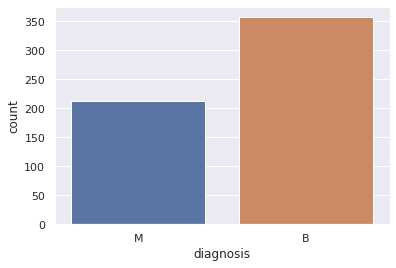

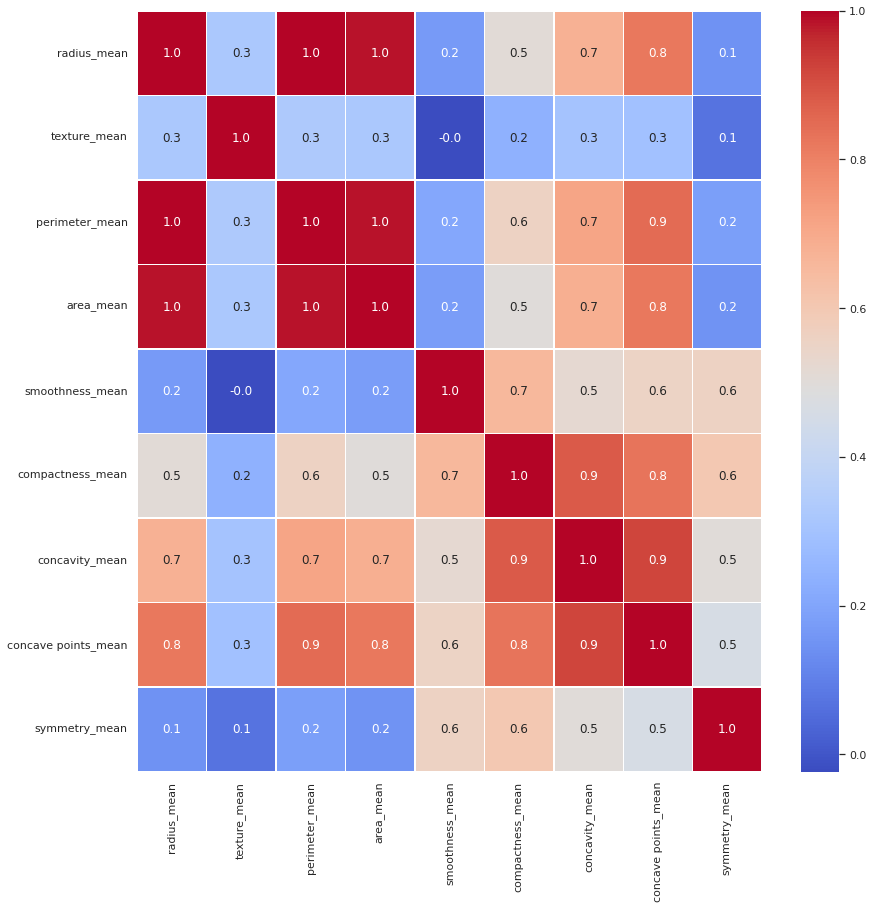

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

sns.set()

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The sharable Link
link = 'https://drive.google.com/file/d/1MBQ9zqolIxxmHeBPyUvnu0Kri909izv8'

# Get id from link
fluff, id = link.split('d/')
#print (id)

# Get File from Gdrive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('breast_cancer.csv')

df = pd.read_csv("breast_cancer.csv")

df.head(10)

y = df.diagnosis
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis=1) # drop unnamed: 32 column
sns.countplot(df['diagnosis'],label='Count')

B,M = y.value_counts()
print('Number of Benign:',B)
print('Number of Malignant:',M)
corr = df[df.columns[1:11]].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar ='True',annot=True,linewidths=.5,fmt='.1f',cmap='coolwarm')
X = StandardScaler().fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
n_jobs=None, n_neighbors=5, p=2, weights='uniform')
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    elif train==False:
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

